# Sentiment Analysis

In this post we are going to learn more about the [technical requirements to become a Data Scientist](https://medium.com/@fmnobar/data-scientist-role-requirements-bbae1f85d4d5) by taking a closer look at Sentiment Analysis. In the field of Natural Language Processing (NLP), sentiment analysis is a tool to identify, quantify, extract and study subjective information from textual data. For example, "I like watching TV shows." carries a positive sentiment. But maybe the sentiment could even be "relatively more" positive if one says that "I really like watching TV shows!". Sentiment analysis attempts at quantifying the sentiment conveyed in textual data. One of the most common use cases of sentiment analysis is enabling brands and businesses to review their customers' feedback and monitor their level of satisfaction. As you can imagine, it would be quite expensive to have human headcount read customer reviews to determine whether the customers are happy or not with the business, service, or products. In such cases brands and businesses use machine learning techniques such as sentiment analysis to achieve similar results at scale.

Similar to my other posts, learning is achieved through practice questions and answers. I will include hints and explanations in the questions as needed to make the journey easier. Lastly, the notebook that I used to create this exercise is also linked in the bottom of the post, which you can download, run and follow along.

Let’s get started!

## Data Set

In order to practice sentiment analysis, we are going to use a test set from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sentiment+labelled+sentences), which can be downloaded from [this link](https://gist.github.com/fmnobar/88703ec6a1f37b3eabf126ad38c392b8). 

Let's start with importing the libraries we will be using today, then read the data set into a dataframe and look at the top five rows of the dataframe to familiarize ourselves with the data.

In [46]:
# Import required packages
import numpy as np
import pandas as pd
import nltk

# Making width of the column viewable
pd.set_option('display.max_colwidth', None)

# Read the data into a dataframe
df = pd.read_csv('imdb_labelled.csv')

# look at the top five rows of the dataframe
df.head()

text  \
0                                                                                                       A very, very, very slow-moving, aimless movie about a distressed, drifting young man.     
1                                                                                           Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.     
2  Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.     
3                                                                                                                                                  Very little music or anything to speak of.     
4                                                                                  The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.     

   label  
0      0  
1      0  
2      0  
3      0  
4      1

There are only two columns. "text" contains the review itself and "label" indicates the sentiment of the review. In this dataset a label of 1 indicates a postivie sentiment, while a label of 0 indicates a negative sentiment. Since there are only two classes of labels, let's look at whether these two classes are balanced or imbalanced. Classes are considered balanced when classes (roughly) account for the same portion of the total observations. Let's look at the data, which makes this easier to understand. 

In [47]:
df['label'].value_counts()

1    386
0    362
Name: label, dtype: int64

The data is almost equally divided between positive and negative sentiments, therefore we consider the data to have balanced classes.

Next, we are going to create a sample string, which includes the very first entry in the "text" column of the dataframe. In some of the questions, we will apply various techniques to this one sample to better understand the concepts. Let's go ahead and create our sample string.

In [48]:
# Take the very first text entry of the dataframe
sample = df.text[0]
sample

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

# Tutorial + Questions and Answers

## Tokens and Bigrams

In order for programs and computers to understand textual data, we start by breaking down larger segments of textual data into smaller pieces. Breaking down a sequence of characters (such as a string) into smaller pieces (or substrings) is called tokenization and the functions that perform tokenization are called tokenizers. A tokenizer can break down a given string into a list of substrings. Let's look at an example. 

Input: `What is a sentence?`

If we apply a tokenizer to the above "Input", we will get the following "Output":

Output: `['What', 'is', 'a', 'sentence', '?']`

As expected, the output is a sequence of the tokenized substrings of the input sentence. 

We can implement this concept with the `nltk.word_tokenize` package. Let's see how this is implemented in an example.

**Question 1:**

Tokenize the generated sample and return the first 10 tokens.

**Answer:**

In [49]:
# Import the package
from nltk import word_tokenize

# Tokenize the sample
sample_tokens = word_tokenize(sample)

# Return the first 10 tokens
sample_tokens[:10]

['A', 'very', ',', 'very', ',', 'very', 'slow-moving', ',', 'aimless', 'movie']

A token is also called a unigram. If we combine two unigrams, we get to a bigram (and this process can continue). Formally, a bigram is an n-gram where n equals two. An n-gram is a sequence of n adjacent items from a given sample of text. Therefore, a bigram is a sequence of two adjacent elements from a string of tokens. It will be easier to understand in an example:

Original Sentence: `What is a sentence?`

Tokens: `['What', 'is', 'a', 'sentence', '?']`

Bigrams: `[('What', 'is'), ('is', 'a'), ('a', 'sentence'), ('sentence', '?')]`

As defined, each two adjacent tokens are now represented in one bigram.

We can implement this concept with the `nltk.bigrams` package.

**Question 2:**

Create a list of bigrams from the tokenized sample and return the first 10 bigrams. 

**Answer:**

In [50]:
# Import the package
from nltk import bigrams

# Create the bigrams
sample_bitokens = list(bigrams(sample_tokens))

# Return the first 10 bigrams
sample_bitokens[:10]

[('A', 'very'),
 ('very', ','),
 (',', 'very'),
 ('very', ','),
 (',', 'very'),
 ('very', 'slow-moving'),
 ('slow-moving', ','),
 (',', 'aimless'),
 ('aimless', 'movie'),
 ('movie', 'about')]

## Frequency Distribution

Let's go back to the tokens (unigrams) that we created from our sample. It is good to see what tokens are out there but it might be more informative to know which tokens have a higher representation compared to others in a given textual input. In other words, an occurrence frequency distribution of tokens would be more informative. More formally, a frequency distribution records the number of times each outcome of an experiment has occurred.

Let's implement a frequency distribution using `nltk.FreqDist` package. 

**Question 3:**

What are the top 10 most frequent tokens in our sample?

**Answer:**

In [51]:
# Import the package
from nltk import FreqDist

# Create the frequency distribution for all tokens
sample_freqdist = FreqDist(sample_tokens)

# Return top ten most frequent tokens
sample_freqdist.most_common(10)

[(',', 4),
 ('very', 3),
 ('A', 1),
 ('slow-moving', 1),
 ('aimless', 1),
 ('movie', 1),
 ('about', 1),
 ('a', 1),
 ('distressed', 1),
 ('drifting', 1)]

Some of the results intuitively make sense. For exmaple, a comma, "the", "a" or periods can be quite common in a given textual input. Now let's put all of these steps into one Python function to streamline the process. If you need a refresher on Python functions, I have a post with practice questions on Python functions [linked here](https://medium.com/@fmnobar/python-foundation-for-data-science-advanced-functions-practice-notebook-dbe4204b83d6).

**Question 4:**

Create a function named "top_n" that takes in a text as an input and returns the top n most common tokens in the given text. Use "text" and "n" as the function arguments. Then try it on our sample to reproduce the results from the previous question. 

**Answer:**

In [52]:
# Create a function to accept a text and n and returns top n most common tokens
def top_n(text, n):
    # Create tokens
    tokens = word_tokenize(text)
    
    # Create the frequency distribution
    freqdist = FreqDist(tokens)
    
    # Return the top n most common ones
    return freqdist.most_common(n)

# Try it on the sample
top_n(df.text[1], 10)

[('the', 2),
 ('Not', 1),
 ('sure', 1),
 ('who', 1),
 ('was', 1),
 ('more', 1),
 ('lost', 1),
 ('-', 1),
 ('flat', 1),
 ('characters', 1)]

We were able to reproduce the same output using the function. 

A Document-Term Matrix (DTM) is a matrix that represents the frequency of terms that occur in a collection of documents. Let's look at two sentences to understand what DTM is. 

Let's say that we have the following two sentences:
```
sentence_1 = 'He is walking down the street.'

sentence_2 = 'She walked up then walked down the street yesterday.'
```
The DTM of the above two sentences will be:

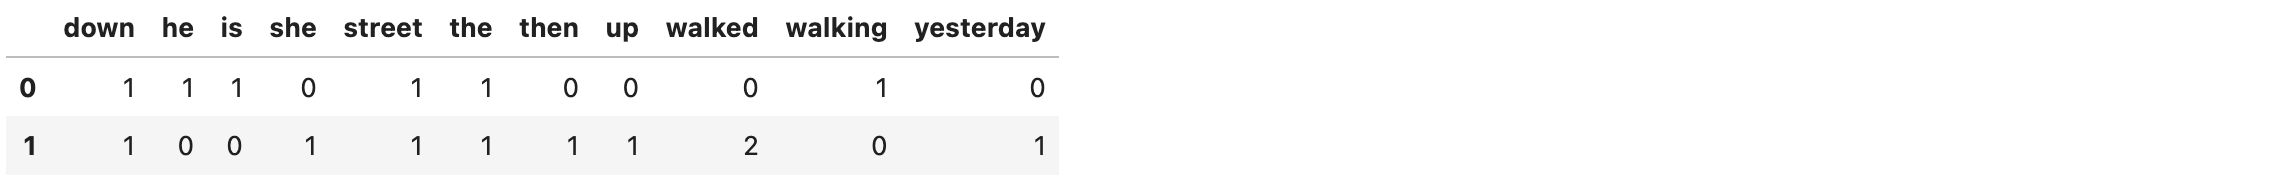

In this DTM, numbers indicate how many times that particular term was observed in the given sentence. For example, "down" is present once in both sentences, while "walked" appears twice but only in the second sentence. 

Now let's look at how we can implement a DTM concept, using `sklearn`'s `CountVectorizer`. Note that the DTM that is initially created using `sklearn` is in the form of a sparse matrix/array (i.e. most of the entries are zero). This is done for efficiency reasons but we will need to convert the sparse array to a dense array (i.e. most of the values are non-zero). Since understanding the differentiation between sparse and dense arrays are not the intention of this post, we won't go deeper into that topic.

**Question 5:**

Define a function named "create_dtm" that creates a Document-Term Matrix in the form of a dataframe for a given series of strings. Then test it on the top five rows of our data set.

**Answer:**

In [53]:
# Import the package
from sklearn.feature_extraction.text import CountVectorizer

def create_dtm(series):
    # Create an instance of the class
    cv = CountVectorizer()
    
    # Create a document term matrix from the provided series
    dtm = cv.fit_transform(series)
    
    # Convert the sparse array to a dense array
    dtm = dtm.todense()
    
    # Get column names
    features = cv.get_feature_names_out()
    
    # Create a dataframe
    dtm_df = pd.DataFrame(dtm, columns = features)
    
    # Return the dataframe
    return dtm_df

# Try the function on the top 5 rows of the df['text']
create_dtm(df.text.head())

about  acting  aimless  almost  and  angles  anything  artiness  as  \
0      1       0        1       0    0       0         0         0   0   
1      0       0        0       0    0       0         0         0   0   
2      0       1        0       1    3       1         0         1   1   
3      0       0        0       0    0       0         1         0   0   
4      0       0        0       0    0       0         0         0   0   

   attempting  ...  trying  very  walked  was  when  white  who  whom  with  \
0           0  ...       0     3       0    0     0      0    0     0     0   
1           0  ...       0     0       1    1     0      0    1     1     0   
2           1  ...       0     0       0    1     0      1    0     0     1   
3           0  ...       0     1       0    0     0      0    0     0     0   
4           0  ...       1     0       0    1     1      0    0     0     0   

   young  
0      1  
1      0  
2      0  
3      0  
4      0  

[5 rows x 68 columns]

## Feature Importance

Now we want to think about sentiment analysis as a machine learning model. In such a machine learning model, we would like the model to take in the textual input and make predictions about the sentiment of each textual entry. In other words, the textual input is the independent variable and the sentiment is the dependent variable. We also learned that we can break down the text into smaller pieces named tokens, therefore, we can think of each of the tokens within the textual input as "features" that help in predicting the sentiment as the output of the machine learning model. To summarize, we started with a machine learning model that took in large textual data and predicted sentiments but now we have converted our task into a model that takes in multiple "tokens" (instead of a large body of text) and predicts the sentiment based on the given tokens. Then the next logical step would be to make an attempt at quantifying which of the tokens (i.e. features) are more important in predicting the sentiment. This task is called feature importance. 

Luckily for us, feature importance can be easily implemented in `sklearn`. Let's look at an example together. 

**Question 6:**

Define a function named "top_n_tokens" that accepts three arguemnts: (1) "text", which is the textual input in the format of a data frame column, (2) "sentiment", which is the label of the sentiment for the given text in the format of a data frame column, and (3) "n", which is a positive number. The function will return the top "n" most important tokens (i.e. features) to predict the "sentiment" of the "text". Please use `LogisticRegression` from `sklearn.linear_model` with the following parameters: `solver = 'lbfgs'`, `max_iter = 2500`, and `random_state = 1234`. Finally, use the function to return the top 10 most important tokens in the "text" column of the dataframe.

***Note:** Since the goal of this post is to explore sentiment analysis, we assume the reader is familiar with Logistic Regression. If you would like to take a deeper look at Logistic Regression, check out [this post](https://medium.com/@fmnobar/logistic-regression-overview-through-11-practice-questions-practice-notebook-64e94cb8d09d).*

**Answer:**

In [54]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

def top_n_tokens(text, sentiment, n):
    # Create an instance of the class
    lgr = LogisticRegression(solver = 'lbfgs', max_iter = 2500, random_state = 1234)
    cv = CountVectorizer()
    
    # create the DTM
    dtm = cv.fit_transform(text)
    
    # Fit the logistic regression model
    lgr.fit(dtm, sentiment)
    
    # Get the coefficients
    coefs = lgr.coef_[0]
    
    # Create the features / column names
    features = cv.get_feature_names_out()
    
    # create the dataframe
    df = pd.DataFrame({'Tokens' : features, 'Coefficients' : coefs})
    
    # Return the largest n
    return df.nlargest(n, 'Coefficients')

# Test it on the df['text']
top_n_tokens(df.text, df.label, 10)

Tokens  Coefficients
1567      liked      1.286747
2997  wonderful      1.242158
1104      funny      1.112821
1182      great      1.068772
2949       well      1.043139
246   beautiful      1.042833
0            10      1.035405
344   brilliant      1.014080
908   excellent      1.009914
2203      right      0.985806

Results are quite interesting. We were looking for the most important features and as we know label 1 indicated a positive sentiment in the dataset. In other words, the most important features (i.e. the ones with the highest coefficients) will be the ones that indicate a strong positive sentiment. This comes across in the results, which all sound quite positive.

In order to validate this hypothesis, let's look at the 10 smallest coefficients (i.e. the least important features). We expect those to convey a strong negative sentiment.

In [55]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

def bottom_n_tokens(text, sentiment, n):
    # Create an instance of the class
    lgr = LogisticRegression(solver = 'lbfgs', max_iter = 2500, random_state = 1234)
    cv = CountVectorizer()
    
    # create the DTM
    dtm = cv.fit_transform(text)
    
    # Fit the logistic regression model
    lgr.fit(dtm, sentiment)
    
    # Get the coefficients
    coefs = lgr.coef_[0]
    
    # Create the features / column names
    features = cv.get_feature_names_out()
    
    # create the dataframe
    df = pd.DataFrame({'Tokens' : features, 'Coefficients' : coefs})
    
    # Return the largest n
    return df.nsmallest(n, 'Coefficients')

# Test it on the df['text']
bottom_n_tokens(df.text, df.label, 10)

Tokens  Coefficients
222       bad     -1.872751
211     awful     -1.334554
2530   stupid     -1.175416
441     cheap     -1.139512
1802       no     -1.137234
893      even     -1.091436
3017    would     -1.047931
3012    worst     -1.039231
2923    waste     -1.038206
1819  nothing     -0.973472

As expected, these words convey a strong negative sentiment. 

In the previous example, we trained a logistic regression model on the existing labeled data. But what if we do not have labeled data and would like to determine the sentiment of a given data set? In such cases, we can leverage pre-trained models, such as TextBlob, which we will discuss next. 

## Pre-Trained Models - TextBlob

TextBlob is a library for processing textual data and one of its functions returns the sentiment of a given data in the format of a named tuple as follows: "(polarity, subjectivity)". The polarity score is a float within the range of [-1.0, 1.0] that aims at differentiating whether the text is positive or negative. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. For example, a fact is expected to be objective and one's opinion is expected to be subjective. Polarity and subjectivity detection are two of the most common tasks within sentiment analysis, which we will explore in the next question.

**Question 7:**

Define a function named "polarity_subjectivity" that accepts two arguments. The function applies "TextBlob" to the provided "text" (defaulting to "sample") and if `print_results = True`, prints polarity and subjectivity of the "text" using "TextBlob", otherwise returns a tuple of float values with the first value being polarity and the second value being subjectivity, such as "(polarity, subjectivty)". Returning the tuple should be the default for the function (i.e. set `print_results = False`). Lastly, use the function on our sample and print the results. 

***Hint:** If you need to install TextBlob you can do so using the following command: `!pip install textblob`*

**Answer:**

In [56]:
# Import TextBlob
from textblob import TextBlob

def polarity_subjectivity(text = sample, print_results = False):
    # Create an instance of TextBlob
    tb = TextBlob(text)
    
    # If the condition is met, print the results, otherwise, return the tuple
    if print_results:
        print(f"Polarity is {round(tb.sentiment[0], 2)} and subjectivity is {round(tb.sentiment[1], 2)}.")
    else:
        return(tb.sentiment[0], tb.sentiment[1])
    
# Test the function on our sample
polarity_subjectivity(sample, print_results = True)

Polarity is 0.18 and subjectivity is 0.4.


Let's look at the sample and try to interpret these values. 

In [57]:
sample

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

Interpreting these results are more meaningful in comparison to other strings but in the absence of such a comparison and purely based on the numbers, let's try to intrepret the reuslts. The results indicate that our sample has a neutral to positive polarity (remember polarity ranges from -1 to 1, therefore 0.18 would indicate neutral to positive) and is relatively subjective, which makes intuitive sense since this is someone's review describing their subjective experience about a movie. 

**Question 8:**

First define a function named "token_count" that accepts a string and using `nltk`'s word tokenizer, returns an integer number of tokens in the given string. Then define a second function named "series_tokens" that accepts a Pandas Series object as an argument and applies the previously-defined "token_count" function to the given Series, returning the integer number of tokens for each row of the given Series. Lastly, use the second function on the top 10 rows of our dataframe and return the results. 

**Answer:**

In [58]:
# Import libraries
from nltk import word_tokenize

# Define the first function that counts the number of tokens in a given string
def token_count(string):
    return len(word_tokenize(string))

# Define the second function that applies the token_count function to a given Pandas Series
def series_tokens(series):
    return series.apply(token_count)

# Apply the function to the top 10 rows of the dataframe
series_tokens(df.text.head(10))

0    18
1    21
2    33
3     9
4    22
5    27
6     4
7    17
8     4
9    11
Name: text, dtype: int64

**Question 9:**

Define a function named `series_polarity_subjectivity` that applies the `polarity_subjectivity()` function defined in Question 7 to a Pandas Series (in the form of a dataframe column) and returns the results. Then use the function on the top 10 rows of our dataframe to see the results.

**Answer:**

In [59]:
# Define the function
def series_polarity_subjectivity(series):
    return series.apply(polarity_subjectivity)

# Apply to the top 10 rows of the df['text']
series_polarity_subjectivity(df['text'].head(10))

0                                 (0.18, 0.395)
1    (0.014583333333333337, 0.4201388888888889)
2    (-0.12291666666666666, 0.5145833333333333)
3                  (-0.24375000000000002, 0.65)
4                                    (1.0, 0.3)
5                                   (-0.1, 0.5)
6                                   (-0.2, 0.0)
7                     (0.7, 0.6000000000000001)
8                                   (-0.2, 0.5)
9                                    (0.7, 0.8)
Name: text, dtype: object

## Measure of Complexity - Lexical Diversity

As the name suggests, Lexical Diversity is a measurement of how many different lexical words there are in a given text and is formulaically defined as the number of unique tokens over the total number of tokens. The idea is that the more diverse lexical tokens in a text are, the more complex that text is expected to be. Let's look at an example. 

**Question 10:**

Define a "complexity" function that accepts a string as an argument and returns the lexical complexity score defined as the number of unique tokens over the total number of tokens. Then apply the function to the top 10 rows of our dataframe. 

**Answer:**

In [60]:
def complexity(string):
    # Create a list of all tokens
    total_tokens = word_tokenize(string)
    
    # Create a set of all tokens (which only keeps unique values)
    unique_tokens = set(word_tokenize(string))
    
    # Return the complexity measure
    if len(total_tokens) == 0:
        return 0
    else:
        return len(unique_tokens) / len(total_tokens)

# Apply to the top 10 rows of the dataframe
df.text.head(10).apply(complexity)

0    0.722222
1    0.952381
2    0.848485
3    1.000000
4    1.000000
5    0.814815
6    1.000000
7    0.941176
8    1.000000
9    0.909091
Name: text, dtype: float64

## Stopwords and Non-Alphabeticals

If you recall in Question 3 we conducted a Frequency Distribution and the resulting 10 most common tokens were as follows: 
```
[(',', 4), ('very', 3), ('A', 1), ('slow-moving', 1), ('aimless', 1), ('movie', 1), ('about', 1), ('a', 1), ('distressed', 1), ('drifting', 1)]
```

Some of these are not very helpful and are considered less significant compared to other tokens. For example, how much information can be gained from knowing that periods are quite common in a given text? An attempt at filtering out such less significant words so that the focus can be directed towards more significant words is called removal of the stopwords. Note that there is no universal definition of what these stopwords are and this designation is purely subjective.  

Let's look at some examples of English stopwords, as defined by `nltk`:

In [61]:
# Import library
from nltk.corpus import stopwords

# Select only English stopwords
english_stop_words = stopwords.words('english')

# Print the first 20
print(english_stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


**Question 11:**

Define a function named "stopword_remover" that accepts a string as argument, tokenizes the input string, removes the English stopwords (as defined by `nltk`), and returns the tokens without the stopwords. Then apply the function to the top 5 rows of our dataframe.

**Answer:**

In [62]:
def stopword_remover(string):
    # Tokenize the string
    tokens = word_tokenize(string)
    
    # Create a list of English stopwords
    english_stopwords = stopwords.words('english')
    
    # Return non-stopwords
    return [w for w in tokens if w.lower() not in english_stopwords]

# Apply to the top 5 rows of our df['text']
df.text.head(5).apply(stopword_remover)

0                                                                                                 [,, ,, slow-moving, ,, aimless, movie, distressed, ,, drifting, young, man, .]
1                                                                                                        [sure, lost, -, flat, characters, audience, ,, nearly, half, walked, .]
2    [Attempting, artiness, black, &, white, clever, camera, angles, ,, movie, disappointed, -, became, even, ridiculous, -, acting, poor, plot, lines, almost, non-existent, .]
3                                                                                                                                            [little, music, anything, speak, .]
4                                                                                                     [best, scene, movie, Gerardo, trying, find, song, keeps, running, head, .]
Name: text, dtype: object

Another group of tokens that we can consider filtering out, similar to stopwords, is the non-alphabeticals. As the name suggests, examples of non-alphabeticals are: `! % & # * $` (note that space is also considered a non-alphabetical). To help identify what is considered alphabetical or not, we can use `isalpha()`, which is a built-in Python function that checks whether all characters in a given string are alphabets or not. Let's look at a few examples to better understand this concept:

In [63]:
string_1 = "TomAndJerryAreFun"
string_2 = "Tom&JerryAreFun"
string_3 = "TomAndJerryAreFun!"

print(f"String_1: {string_1.isalpha()}\n")
print(f"String_2: {string_2.isalpha()}\n")
print(f"String_3: {string_3.isalpha()}")

String_1: True

String_2: False

String_3: False


Let's look at each one to better understand what happened. The first one returned "True" indicating the string contains only alpabeticals. The second one returned "False", which was because of "&" and the third one also returned "False", driven by the "!".

Now that we are familiar with how `isalpha()` works, let's use it in our example to further clean up our data.

**Question 12:**

Define a function named "stopword_nonalpha_remover" that accepts a string as an argument, removes both stopwords (using the `stopword_remover()` function that we defined in the previous question) and non-alphabeticals and then returns the remainder. Apply this function to the top 5 rows of our dataframe and visually compare to the outcome of the previous question (which still included the non-alphabeticals).

**Answer:**

In [64]:
def stopword_nonalpha_remover(string):
    return [x for x in stopword_remover(string) if x.isalpha()]

df.text.head().apply(stopword_nonalpha_remover)

0                                                                                                [aimless, movie, distressed, drifting, young, man]
1                                                                                    [sure, lost, flat, characters, audience, nearly, half, walked]
2    [Attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ridiculous, acting, poor, plot, lines, almost]
3                                                                                                                  [little, music, anything, speak]
4                                                                           [best, scene, movie, Gerardo, trying, find, song, keeps, running, head]
Name: text, dtype: object

As expected, the non-alphabeticals were removed, in addition to the stopwords. Therefore the tokens that are expected to have a higher significance, compared to the removed ones.

In the next step, we will put together everything that we have learned so far to find out which reviews had the highest complexity score.

**Question 13:**

Define a function named "complexity_cleaned" that accepts a Series and removes the stopwords and non-alphabeticals (using the function defined in Question 12). Then create a column named "complexity" in our dataframe that uses the "complexity_cleaned" function to calculate the complexity. Finally, return the rows of the dataframe for the 10 largest complexity scores.

**Answer:**

In [65]:
# Define the complexity_cleaned function
def complexity_cleaned(series):
    return series.apply(lambda x: complexity(' '.join(stopword_nonalpha_remover(x))))

# Add 'complexity' column to the dataframe
df['complexity'] = complexity_cleaned(df.text)

# Return top 10 highest complexity scores
df.sort_values('complexity', ascending = False).head(10)

text  \
0                                                                                      A very, very, very slow-moving, aimless movie about a distressed, drifting young man.     
484                                                                                                  Kris Kristoffersen is good in this movie and really makes a difference.     
476  Tom Wilkinson broke my heart at the end... and everyone else's judging by the amount of fumbling for hankies and hands going up to faces among males and females alike.     
477                                                                                                                                     Julian Fellowes has triumphed again.     
478                                                                                                                                                He's a national treasure.     
479                                                                                                                                                           GO AND SEE IT!     
480                                                                                                                                               This is an excellent film.     
481                                                                                                                                        The aerial scenes were well-done.     
482                                                                                                                           It was also the right balance of war and love.     
483                                                The film gives meaning to the phrase, "Never in the history of human conflict has so much been owed by so many to so few.     

     label  complexity  
0        0         1.0  
484      1         1.0  
476      1         1.0  
477      1         1.0  
478      1         1.0  
479      1         1.0  
480      1         1.0  
481      1         1.0  
482      1         1.0  
483      1         1.0